In [1]:
import pandas as pd


students = [
    {"STUDENT NAME": "SAHITH CHAND PATHAKOKILA", "SNUMBER": 5362453, "GRIFFITH EMAIL": "sahithchand.pathakokila@griffithuni.edu.au"},
    {"STUDENT NAME": "JAIN GEORGE", "SNUMBER": 5353875, "GRIFFITH EMAIL": "jaingeorge@griffithuni.edu.au"},
    {"STUDENT NAME": "AISHWARYA GUPTA", "SNUMBER": 5331231, "GRIFFITH EMAIL": "aishwarya.gupta@griffithuni.edu.au"}
]


df = pd.DataFrame(students)

# Print the first few rows of the DataFrame to check its contents
df.head()


,STUDENT NAME,SNUMBER,GRIFFITH EMAIL
0,SAHITH CHAND PATHAKOKILA,5362453,sahithchand.pathakokila@griffithuni.edu.au
1,JAIN GEORGE,5353875,jaingeorge@griffithuni.edu.au
2,AISHWARYA GUPTA,5331231,aishwarya.gupta@griffithuni.edu.au


In [2]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

C:\Users\sahit\AppData\Local\Temp\ipykernel_12948\4093729654.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1.1 Describe the dataset

### Load the dataset using pd.read_csv (1 mark)

In [3]:
#Describe the dataset (e.g.: type of column, value range). (1 point)
df = pd.read_csv("dataanalytics1.csv")

C:\Users\sahit\AppData\Local\Temp\ipykernel_12948\1723383138.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataanalytics1.csv")


### Visualize the head of dataset to describe its properties (1 mark)

In [4]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [5]:
#How many records are there in the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [6]:
#How many records are there in the dataset?
print("Total records:", len(df))

Total records: 318477


In [7]:
# Period covered and the number of different dates with job postings
print("Date range from", df['Date'].min(), "to", df['Date'].max())
print("Unique job posting dates:", df['Date'].nunique())

Date range from 2018-10-01T00:00:00.000Z to 2019-03-13T00:00:00.000Z
Unique job posting dates: 163


In [8]:
# Number of locations and which location has the most job postings
print("Total locations:", df['Location'].nunique())
print("Location with most job postings:", df['Location'].mode()[0])

Total locations: 65
Location with most job postings: Sydney


In [9]:
# Number of job sectors and list each with total job postings
print("Total job sectors:", df['Classification'].nunique())
sector_counts = df['Classification'].value_counts()
print(sector_counts)

Total job sectors: 30
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Prop

In [10]:
#Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number. (1 point)
ict_sector_df = df[df['Classification'] == 'Healthcare & Medical']

# Count the number of sub-sectors and job postings in each sub-sector
sub_sector_counts = ict_sector_df['SubClassification'].value_counts()
print("Number of sub-sectors in H & M:", sub_sector_counts.size)
print("Job posting numbers by sub-sector in H & M:")
print(sub_sector_counts)


Number of sub-sectors in H & M: 33
Job posting numbers by sub-sector in H & M:
Nursing - Aged Care                                2130
Physiotherapy, OT & Rehabilitation                 1821
General Practitioners                              1263
Psychology, Counselling & Social Work              1123
Nursing - General Medical & Surgical               1066
Dental                                             1046
Other                                               829
Medical Administration                              812
Pharmacy                                            808
Medical Specialists                                 748
Pharmaceuticals & Medical Devices                   502
Management                                          496
Medical Imaging                                     487
Nursing - A&E, Critical Care & ICU                  446
Nursing - Psych, Forensic & Correctional Health     433
Nursing - Management                                374
Sales                    

In [15]:
#List the salary ranges and their total of job postings. (1 point)
sal_range = pd.DataFrame()
sal_range['LowestSalary'] = df['LowestSalary']
sal_range['HighestSalary'] = df['HighestSalary']

print("Salary Range:")
sal_range.groupby(['LowestSalary', 'HighestSalary']).size()


Salary Range:


LowestSalary  HighestSalary
0             30               62639
30            40               23476
40            50               34436
50            60               27027
60            70               28499
70            80               28712
80            100              24249
100           120              27673
120           150              24514
150           200              25841
200           999              11411
dtype: int64

In [16]:
#List the job types. In each job type, what are the lowest salary and highest salary? (1 point)
# Group by job type and calculate lowest and highest salary
jobtype = pd.DataFrame()
jobtype['JobType'] = df['JobType']
jobtype = jobtype.dropna()
jobtype['LowestSalary'], jobtype['HighestSalary'] = df['LowestSalary'], df['HighestSalary']

jobtype.groupby(['JobType']).agg({'LowestSalary': np.min, 'HighestSalary': np.max})


,LowestSalary,HighestSalary
JobType,,
Casual/Vacation,0,999
Contract/Temp,0,999
Full Time,0,999
Part Time,0,999


# 1.2.Normalize and clean the data.

### Calculate the avarage salary using df.assign (1 mark)

In [17]:
#The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job. (1 point)
df = df.assign(AverageSalary=(df['HighestSalary'] + df['LowestSalary']) / 2)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### Clean Id column using regex (1 mark)

In [18]:
#The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters. (1 point)

df["TempId"] = df["Id"].astype(str).replace(to_replace=r'[^0-9]', value='', regex=True)
# Clean Id column - ensuring IDs are digits only and 8 digits long
df['Id'] = df['Id'].astype(str).str.extract('(\d{8})')
print(df["TempId"].head())
#df["Id"] = #your code to clean Id

0    37404348
1    37404337
2    37404356
3    37404330
4    37404308
Name: TempId, dtype: object


### Clearn date using regex (1 mark)

In [19]:
#The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 point)
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)


# Clean and convert Date column
#df['Date'] = pd.to_datetime(df['Date'].str.split(' ').str[0], errors='coerce')

### Change type of related columns (1 mark)

In [20]:
#Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 point)
df["Id"] = df["Id"].astype('int64')
df["Date"] = pd.to_datetime(df["Date"])

# Print data types after cleaning and conversions to check
print(df.dtypes)

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
TempId                       object
dtype: object


Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
AverageSalary             0
TempId                    0
dtype: int64


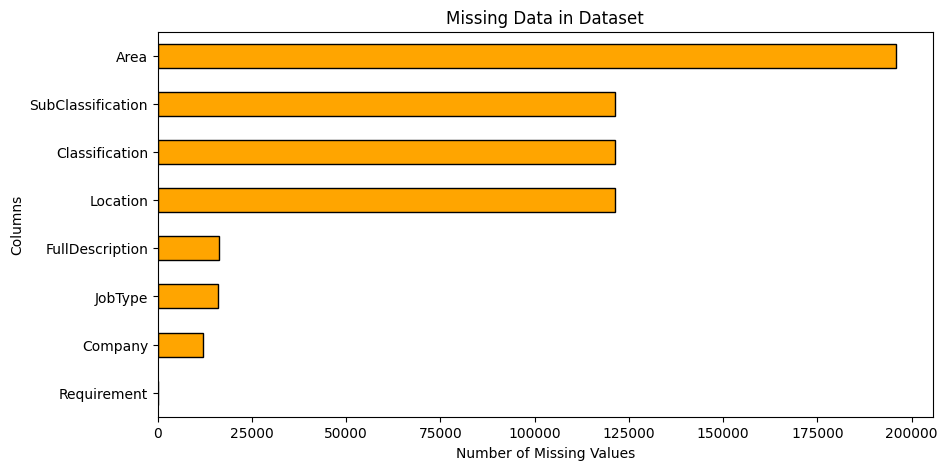

In [126]:
#Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it. ** (1.5 point)

#Check missing data and visualize them in a corresponding chart.** (1.5 point)
#Save the cleaned and preprocessed dataset
# Remove duplicates
df.drop_duplicates(inplace=True)
missing_data = df.isnull().sum()
print(missing_data)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Calculate missing values by column
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filter out columns with no missing data

# Plotting
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
missing_data.sort_values().plot(kind='barh', color='orange', edgecolor='black')
plt.title('Missing Data in Dataset')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

#df1=df.to_csv("preprocessed_data.csv")
#df1.head()

# 1.3. Job metadata

In [21]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']


In [22]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,TempId,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,62639,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,23476,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,34436,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,27027,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,28499,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,28712,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,24249,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,27673,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,24514,"135,000",24514


### Bar chart to display the correlations between “AverageSalary” and the total jobs of each range (2 marks)

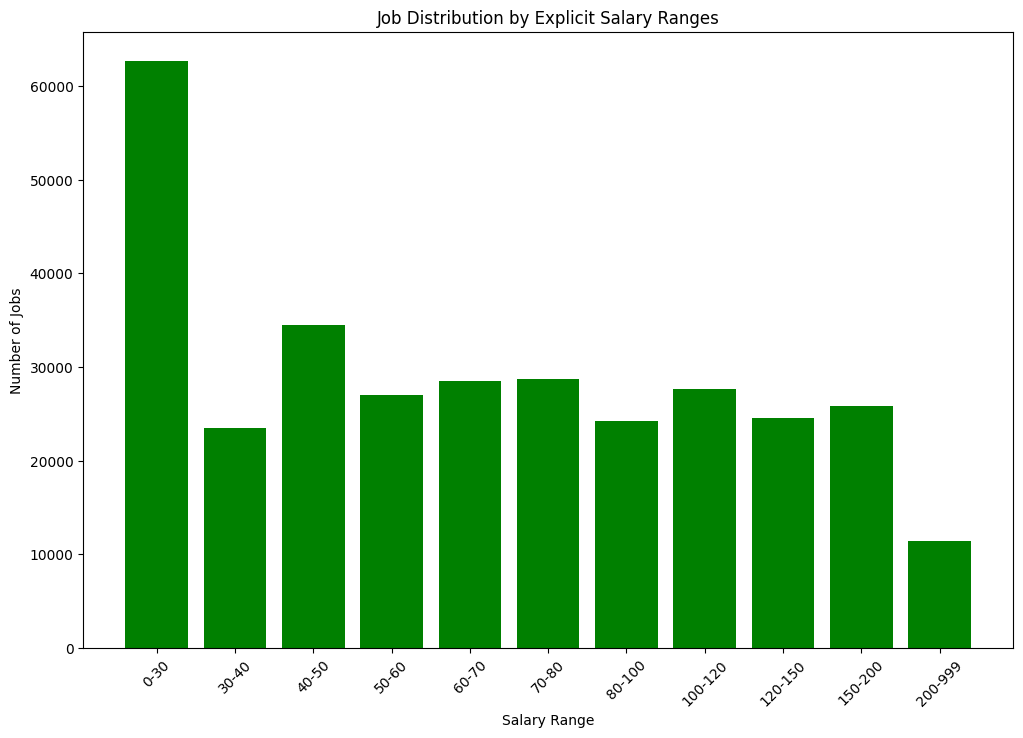

In [23]:
#Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. (1 point)
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your main DataFrame and it has 'LowestSalary' and 'HighestSalary' columns
# Create a new DataFrame focused on salary ranges
sal_range = pd.DataFrame()
sal_range['LowestSalary'] = df['LowestSalary']
sal_range['HighestSalary'] = df['HighestSalary']

# Group by both 'LowestSalary' and 'HighestSalary' and count the number of jobs in each range
salary_group = sal_range.groupby(['LowestSalary', 'HighestSalary']).size().reset_index(name='JobCount')

# Sort the results for better visualization (optional)
salary_group = salary_group.sort_values(by=['LowestSalary', 'HighestSalary'])

# Creating labels for the x-axis
x_labels = salary_group.apply(lambda x: f"{x['LowestSalary']}-{x['HighestSalary']}", axis=1)

# Plotting the results
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.bar(x=x_labels, height=salary_group['JobCount'], color='green', width=0.8)  # Adjust bar width to match the style
plt.xlabel('Salary Range')
plt.ylabel('Number of Jobs')
plt.title('Job Distribution by Explicit Salary Ranges')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


### Pie chart to display the relationship between job types and the number of jobs (2 marks).

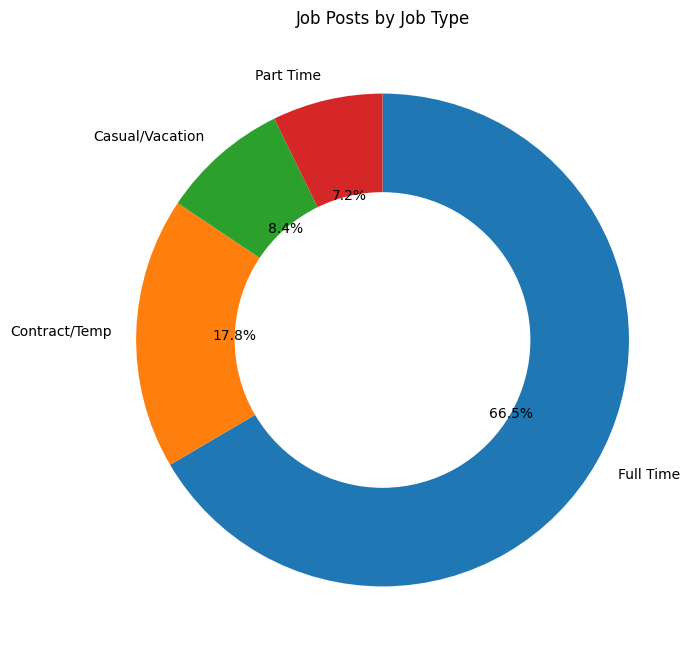

In [24]:
#Display the list of job types and the number of jobs of each type using pie chart. (1 point)
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it contains a 'JobType' column
job_type_counts = df['JobType'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'width': 0.4})

# Add a circle at the center to turn the pie into a donut chart
#centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()  # Get current figure
#fig.gca().add_artist(centre_circle)  # Get current axes and add the circle

plt.title('Job Posts by Job Type')
plt.show()


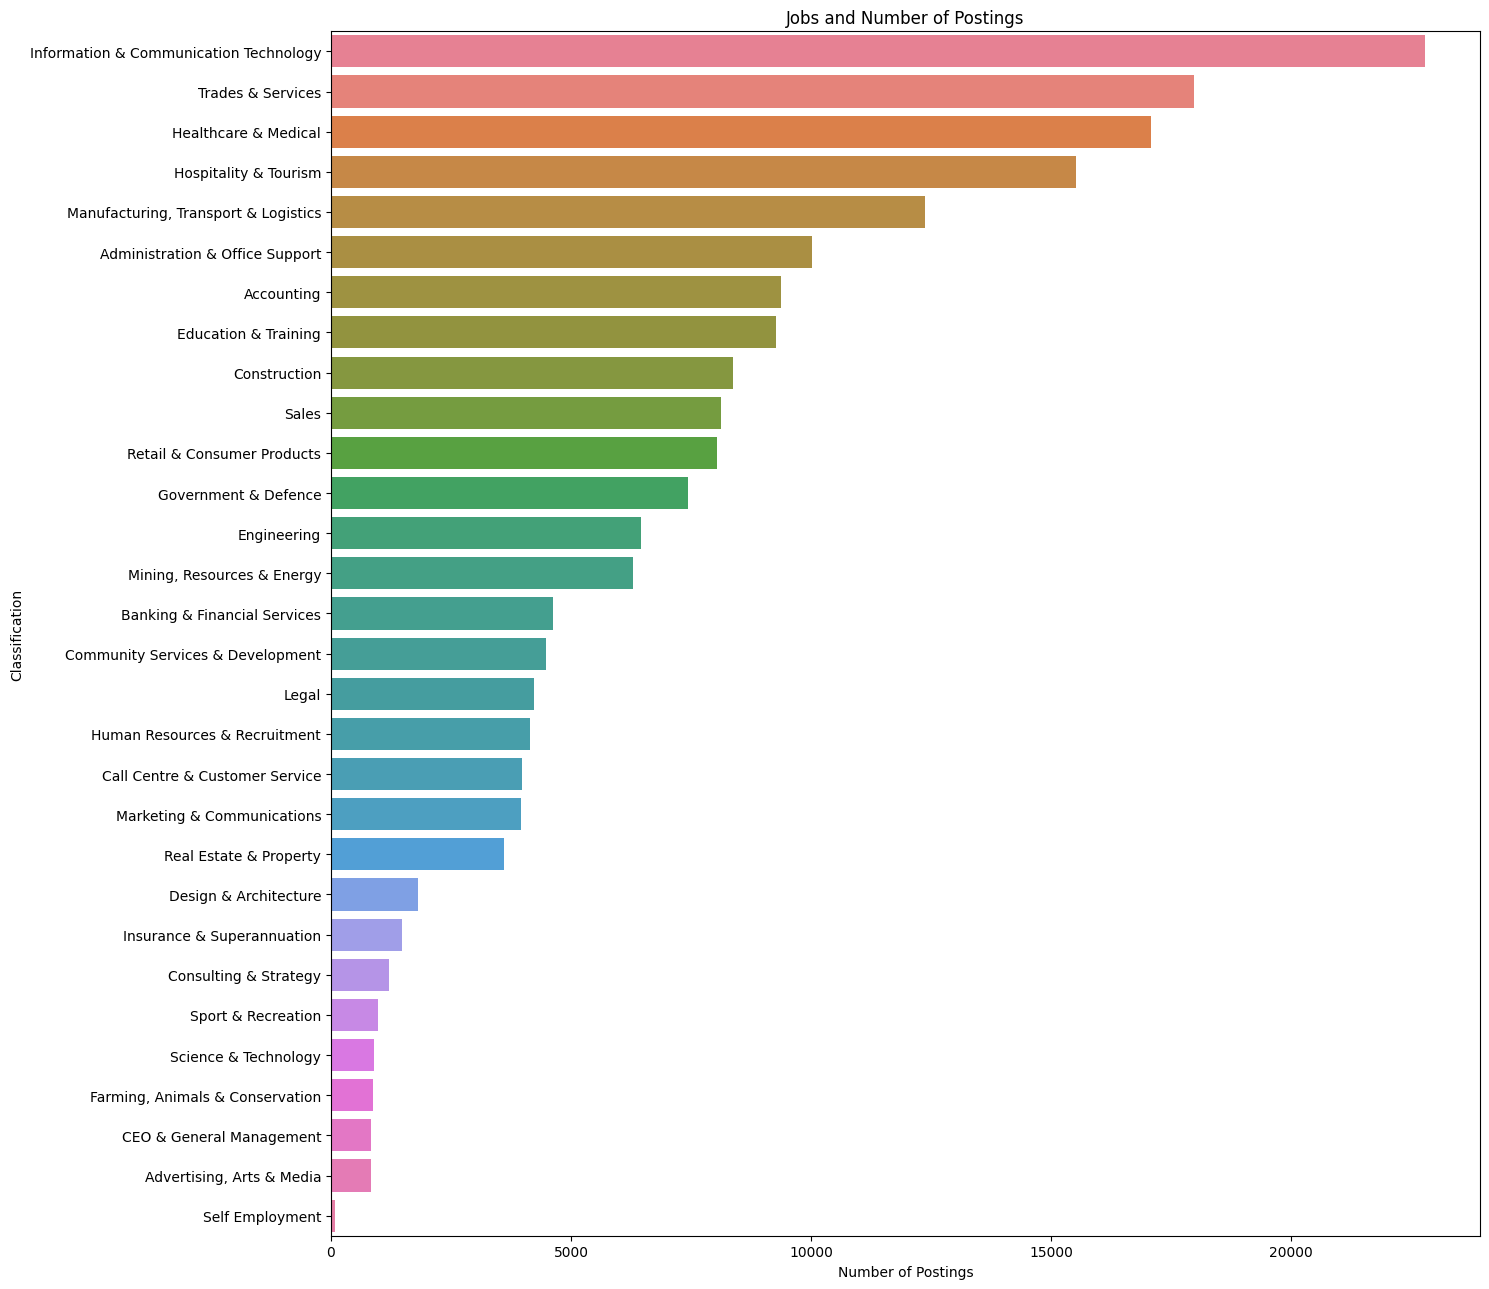

In [25]:
#Display the list of job sectors and the number of jobs of each type using horizontal bar chart. (1 point)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and it has a 'Classification' column
classification_counts = df['Classification'].value_counts()

# Step 3: Create the plot
plt.figure(figsize=(15, 13))

# Using 'tab20' colormap that provides up to 20 distinct colors
# If more than 20 classifications, consider an alternative approach as mentioned
colors = sns.color_palette('tab20', n_colors=len(classification_counts))

# Create the bar plot with the specified colors
sns.barplot(x=classification_counts.values, y=classification_counts.index, palette='husl')
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Classification')
plt.tight_layout()

# Show plot
plt.show()


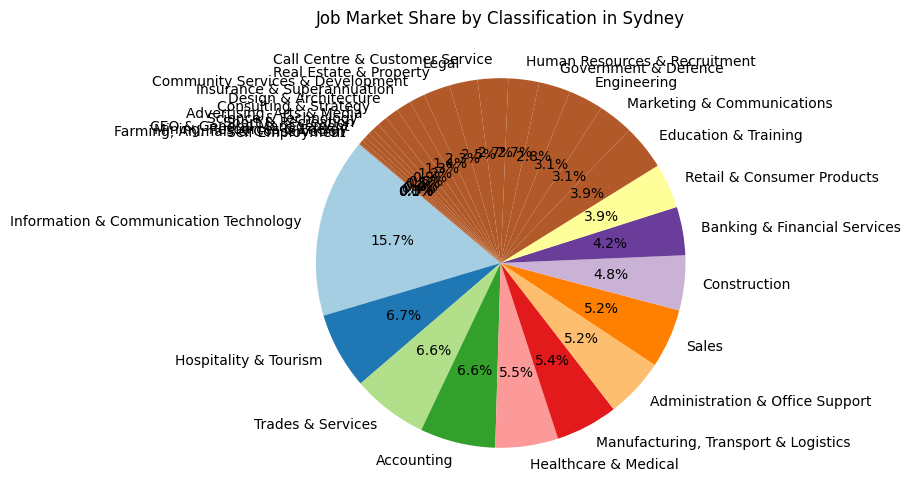

In [26]:
#Choose your favorite location. Visualize the market share of that location in pie chart. (1 point)
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it has 'Location' and 'Classification' columns
# Choose a location, for example, "New York"
chosen_location = "Sydney"

# Filter data for the chosen location
location_data = df[df['Location'] == chosen_location]

# Count the number of jobs in each classification at this location
classification_counts = location_data['Classification'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.pie(classification_counts, labels=classification_counts.index, 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(classification_counts))))

# Optional: Add a circle at the center for a donut-style chart
#centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()  # Get the current figure
#fig.gca().add_artist(centre_circle)  # Get the current axes and add the circle

plt.title(f'Job Market Share by Classification in {chosen_location}')
plt.show()


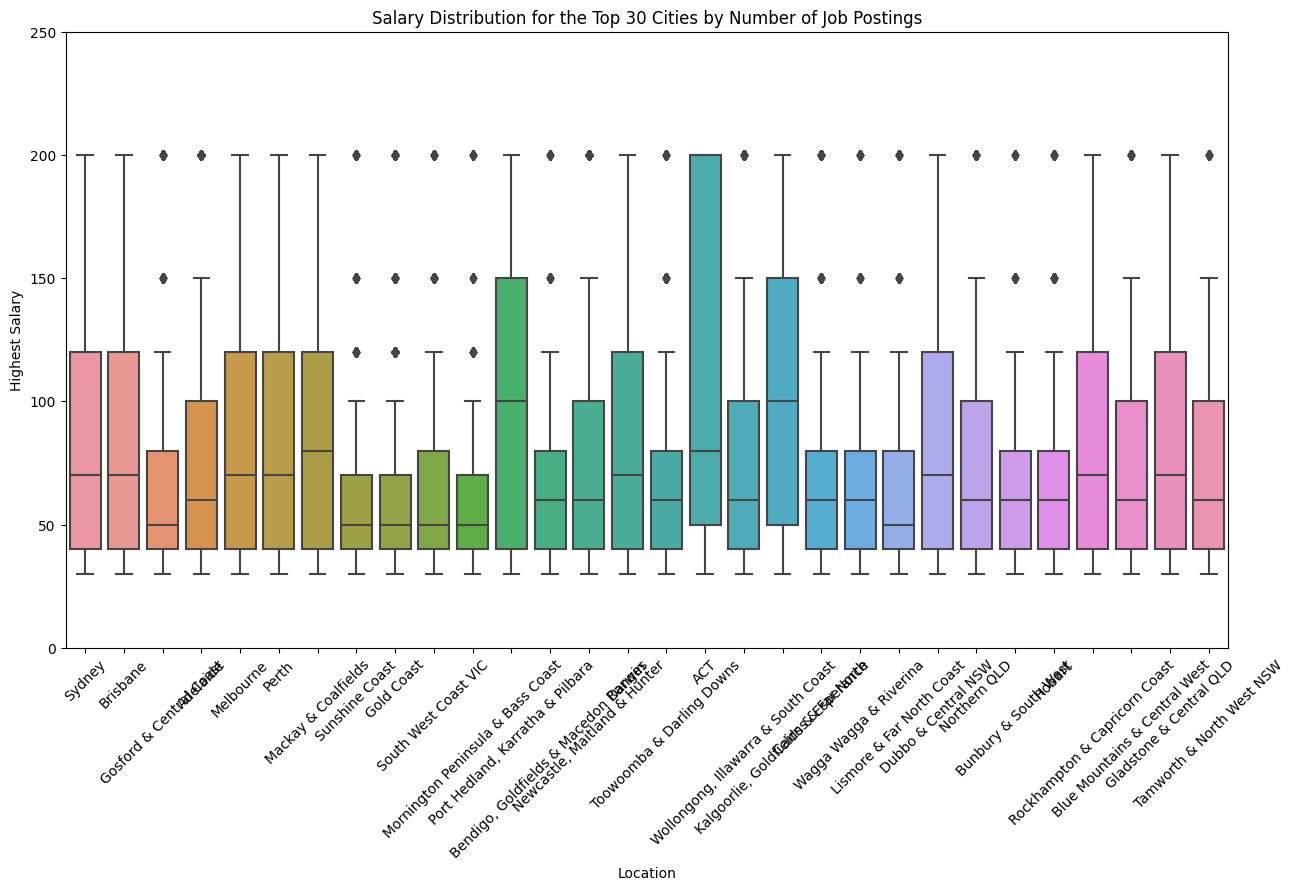

In [27]:
#Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart. (1 point)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and it contains 'Location' and 'HighestSalary' columns
# Step 1: Count the number of job postings per city and find the top 30 cities
top_cities = df['Location'].value_counts().head(30).index

# Step 2: Filter the DataFrame to include only the top 30 cities
top_city_data = df[df['Location'].isin(top_cities)]

# Step 3: Create the boxplot
plt.figure(figsize=(15, 8))  # Set the figure size to make sure all city names are readable
sns.boxplot(x='Location', y='HighestSalary', data=top_city_data)

# Set y-axis limits and ticks
plt.ylim(0, 250)  # Set the limits of the y-axis
plt.yticks(range(0, 251, 50))  # Set the ticks from 0 to 250, every 50

plt.xticks(rotation=45)  # Rotate city names for better visibility
plt.title('Salary Distribution for the Top 30 Cities by Number of Job Postings')
plt.xlabel('Location')
plt.ylabel('Highest Salary')
plt.show()


# Study market by locations

In [134]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,TempId,Location,Count
Location,,,,,,,,,,,,,,,,
ACT,6250,6250,6150,6250,0,6250,6250,6250,5805,6250,6250,5807,6250,6250,ACT,6250
Adelaide,6653,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,6653,6653,Adelaide,6653
Adelaide Hills & Barossa,193,193,186,193,0,193,193,193,182,193,193,182,193,193,Adelaide Hills & Barossa,193
Albany & Great Southern,150,150,149,150,0,150,150,150,134,150,150,134,150,150,Albany & Great Southern,150
Albury Area,416,416,404,416,0,416,416,416,407,416,416,407,416,416,Albury Area,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western QLD,514,514,494,514,0,514,514,514,485,514,514,485,514,514,Western QLD,514
Whyalla & Eyre Peninsula,201,201,191,201,0,201,201,201,198,201,201,198,201,201,Whyalla & Eyre Peninsula,201
"Wollongong, Illawarra & South Coast",1657,1657,1617,1657,0,1657,1657,1657,1583,1657,1657,1583,1657,1657,"Wollongong, Illawarra & South Coast",1657


In [28]:
#Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city?
import pandas as pd

# Example DataFrame loading (make sure to replace this with your actual DataFrame)
# df = pd.read_csv('path_to_your_job_data.csv')

# Filter data for the two cities
city1_data = df[df['Location'] == 'Brisbane']
city2_data = df[df['Location'] == 'Sydney']

# Count the total number of jobs in each city
total_jobs_city1 = city1_data.shape[0]
total_jobs_city2 = city2_data.shape[0]

# Determine which city has more jobs
more_jobs_city = "City1" if total_jobs_city1 > total_jobs_city2 else "City2"

# Count the number of jobs by type in each city
job_types_city1 = city1_data['JobType'].value_counts()
job_types_city2 = city2_data['JobType'].value_counts()

# Output the results
print(f"Total number of jobs in Brisbane: {total_jobs_city1}")
print(f"Total number of jobs in Sydney: {total_jobs_city2}")
print(f"City with more jobs: {more_jobs_city}")

print("\nJob types in Brisbane:")
print(job_types_city1)

print("\nJob types in Sydney:")
print(job_types_city2)


Total number of jobs in Brisbane: 21466
Total number of jobs in Sydney: 60765
City with more jobs: City2

Job types in Brisbane:
Full Time          13004
Contract/Temp       4115
Casual/Vacation     1886
Part Time           1216
Name: JobType, dtype: int64

Job types in Sydney:
Full Time          40607
Contract/Temp      10995
Casual/Vacation     3017
Part Time           2851
Name: JobType, dtype: int64


In [29]:
#In each city, which are top 5 job sectors? How many jobs are there in each sector?
import pandas as pd

# Example DataFrame loading (make sure to replace this with your actual DataFrame)
# df = pd.read_csv('path_to_your_job_data.csv')

# Names of your cities - replace 'City1' and 'City2' with the actual names
city1 = 'Brisbane'
city2 = 'Sydney'

# Filter data for City1
city1_data = df[df['Location'] == city1]

# Filter data for City2
city2_data = df[df['Location'] == city2]

# Find top 5 sectors in City1 and their job counts
top_sectors_city1 = city1_data['Classification'].value_counts().head(5)

# Find top 5 sectors in City2 and their job counts
top_sectors_city2 = city2_data['Classification'].value_counts().head(5)

# Output the results
print(f"Top 5 job sectors in {city1} and their job counts:")
print(top_sectors_city1)
print(f"\nTop 5 job sectors in {city2} and their job counts:")
print(top_sectors_city2)


Top 5 job sectors in Brisbane and their job counts:
Information & Communication Technology    2768
Trades & Services                         1993
Healthcare & Medical                      1824
Manufacturing, Transport & Logistics      1667
Hospitality & Tourism                     1335
Name: Classification, dtype: int64

Top 5 job sectors in Sydney and their job counts:
Information & Communication Technology    9548
Hospitality & Tourism                     4074
Trades & Services                         4026
Accounting                                4010
Healthcare & Medical                      3339
Name: Classification, dtype: int64


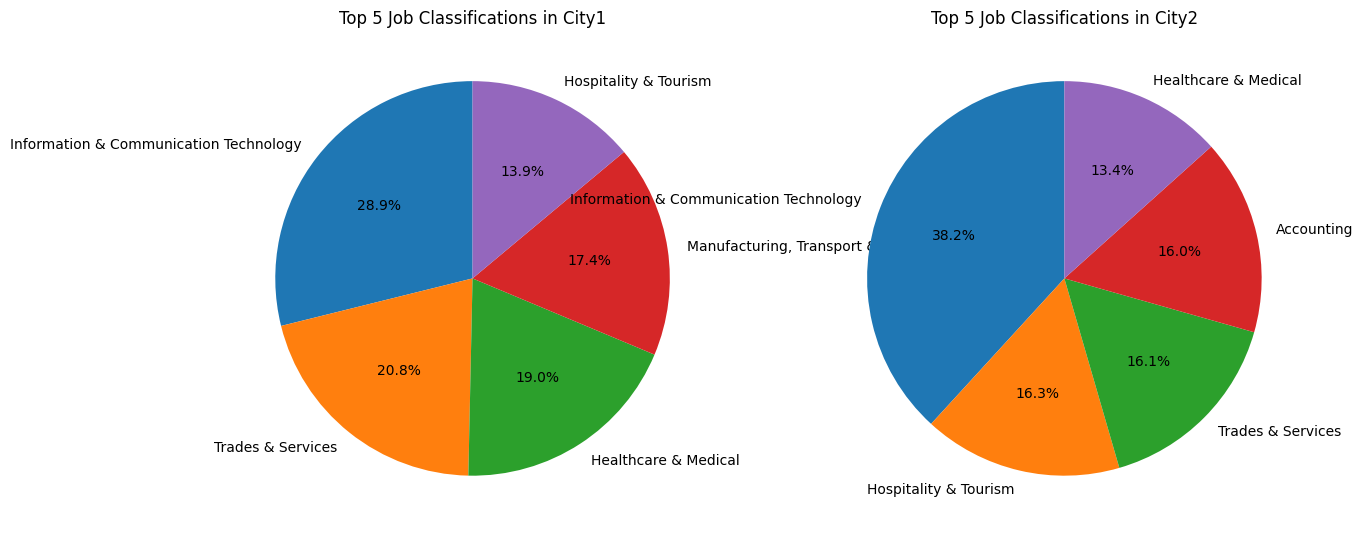

In [30]:
#Visualise the top 5 job sectors in pie chart for each city.*
import matplotlib.pyplot as plt

# Assuming 'top_classifications_city1' and 'top_classifications_city2' are already computed

# Create pie chart for City1
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # This allows plotting multiple charts in one figure: (rows, columns, index)
plt.pie(top_sectors_city1, labels=top_sectors_city1.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Top 5 Job Classifications in City1')

# Create pie chart for City2
plt.subplot(1, 2, 2)
plt.pie(top_sectors_city2, labels=top_sectors_city2.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Top 5 Job Classifications in City2')

# Show the plot
plt.show()


In [31]:
#In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?
import pandas as pd

# Assuming you've already calculated 'AverageSalary' if it wasn't present
if 'AverageSalary' not in df.columns:
    df['AverageSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# Define salary bins and labels for these bins
# Since the max salary is 999, we will create bins that divide this range into smaller intervals
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400-449', '450-499',
          '500-549', '550-599', '600-649', '650-699', '700-749', '750-799', '800-849', '850-899', '900-949', '950-999']

# Create the 'SalaryRange' column
df['SalaryRange'] = pd.cut(df['AverageSalary'], bins=bins, labels=labels)

# Filter data for each city and calculate the number of jobs in each salary range
city1 = 'Brisbane'
city2 = 'Sydney'
city1_salary_distribution = df[df['Location'] == city1]['SalaryRange'].value_counts().sort_index()
city2_salary_distribution = df[df['Location'] == city2]['SalaryRange'].value_counts().sort_index()

# Output the salary distribution for each city
print(f"Salary distribution in {city1}:")
print(city1_salary_distribution)
print(f"\nSalary distribution in {city2}:")
print(city2_salary_distribution)

# Calculate the average salary for each city
average_salary_city1 = df[df['Location'] == city1]['AverageSalary'].mean()
average_salary_city2 = df[df['Location'] == city2]['AverageSalary'].mean()

# Determine which city is better paid on average
better_paid_city = city1 if average_salary_city1 > average_salary_city2 else city2
print(f"\nThe city with a higher average salary is {better_paid_city}.")


Salary distribution in Brisbane:
0-49       8381
50-99      7096
100-149    3396
150-199    1612
200-249       0
250-299       0
300-349       0
350-399       0
400-449       0
450-499       0
500-549       0
550-599     981
600-649       0
650-699       0
700-749       0
750-799       0
800-849       0
850-899       0
900-949       0
950-999       0
Name: SalaryRange, dtype: int64

Salary distribution in Sydney:
0-49       21093
50-99      18920
100-149    11285
150-199     6274
200-249        0
250-299        0
300-349        0
350-399        0
400-449        0
450-499        0
500-549        0
550-599     3193
600-649        0
650-699        0
700-749        0
750-799        0
800-849        0
850-899        0
900-949        0
950-999        0
Name: SalaryRange, dtype: int64

The city with a higher average salary is Sydney.


In [32]:
#List top 5 companies in each city? Which sectors do they belong to?
import pandas as pd

# Example DataFrame loading
# df = pd.read_csv('path_to_your_job_data.csv')

# Select two cities
city1 = 'Brisbane'
city2 = 'Sydney'

# Filter data for each city
city1_data = df[df['Location'] == city1]
city2_data = df[df['Location'] == city2]

# Function to find top 5 companies and the sectors they belong to
def top_companies_and_sectors(city_data):
    # Group by 'Company', count the number of jobs, and join to get sector information
    company_counts = city_data['Company'].value_counts().head(5)
    top_companies = company_counts.index.tolist()
    sectors = city_data[city_data['Company'].isin(top_companies)].drop_duplicates(subset='Company')[['Company', 'Classification']]
    return sectors.set_index('Company').reindex(top_companies)

# Get top 5 companies and their sectors for each city
top_companies_city1 = top_companies_and_sectors(city1_data)
top_companies_city2 = top_companies_and_sectors(city2_data)

# Output the results
print(f"Top 5 companies in {city1} and their sectors:")
print(top_companies_city1)
print(f"\nTop 5 companies in {city2} and their sectors:")
print(top_companies_city2)


Top 5 companies in Brisbane and their sectors:
                                                      Classification
Company                                                             
Jora Local                                     Hospitality & Tourism
Hudson                        Information & Communication Technology
u&u. Recruitment Partners                                 Accounting
The University of Queensland                    Education & Training
Programmed Skilled Workforce    Manufacturing, Transport & Logistics

Top 5 companies in Sydney and their sectors:
                                                       Classification
Company                                                              
Jora Local                                      Hospitality & Tourism
Robert Walters                 Information & Communication Technology
Design & Build                                           Construction
Paxus                          Information & Communication Technology
Blue

In [33]:
#Between 2 cities, which do you think it is better for employees. Explain your choice.*
print("Based on the analyzation between the two cities Brisbane and Sydney, if it is based on the job classification Sydney would be better for the IT employees as the companies were more demanding when compared to Brisbane. Considering the other employees as well and the salary ranges, it would be preferred to Brisbane as a better choice when compared to Sydney.")


Based on the analyzation between the two cities Brisbane and Sydney, if it is based on the job classification Sydney would be better for the IT employees as the companies were more demanding when compared to Brisbane. Considering the other employees as well and the salary ranges, it would be preferred to Brisbane as a better choice when compared to Sydney.


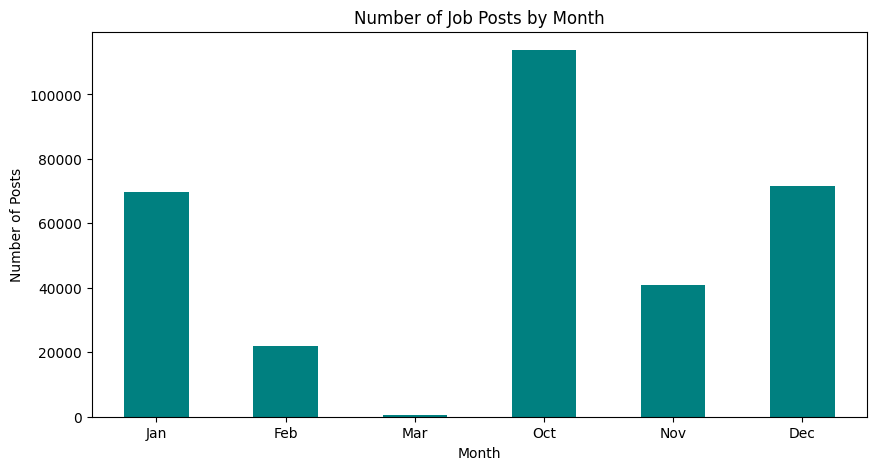

In [34]:
#Visualise the number of job posts by month
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'DatePosted' is the column with date info and has been converted to datetime format
df['Month'] = df['Date'].dt.month
monthly_counts = df.groupby('Month').size()

# Define month names to use as labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='teal')
plt.title('Number of Job Posts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
# Set the x-ticks to month names, ensuring the labels correspond to the actual months in the data
plt.xticks(ticks=range(len(monthly_counts)), labels=[month_labels[i-1] for i in monthly_counts.index], rotation=0)
plt.show()


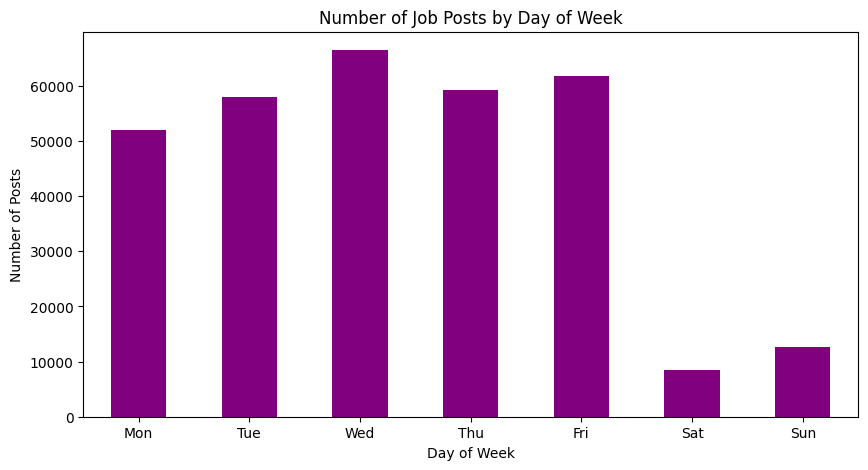

In [35]:
#Visualise the number of job posts by day of week.
df['DayOfWeek'] = df['Date'].dt.dayofweek
day_of_week_counts = df.groupby('DayOfWeek').size()

plt.figure(figsize=(10, 5))
day_of_week_counts.plot(kind='bar', color='purple')
plt.title('Number of Job Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Posts')
plt.xticks(ticks=range(len(day_of_week_counts)), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


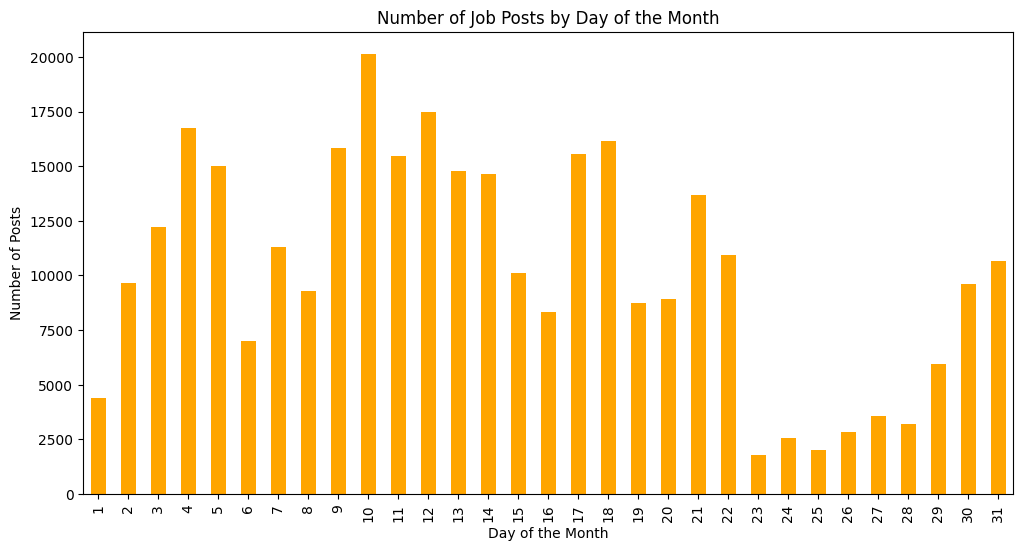

In [36]:
#Visualise the number of job posts by day of the month.
df['DayOfMonth'] = df['Date'].dt.day
day_of_month_counts = df.groupby('DayOfMonth').size()

plt.figure(figsize=(12, 6))
day_of_month_counts.plot(kind='bar', color='orange')
plt.title('Number of Job Posts by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Posts')
plt.show()


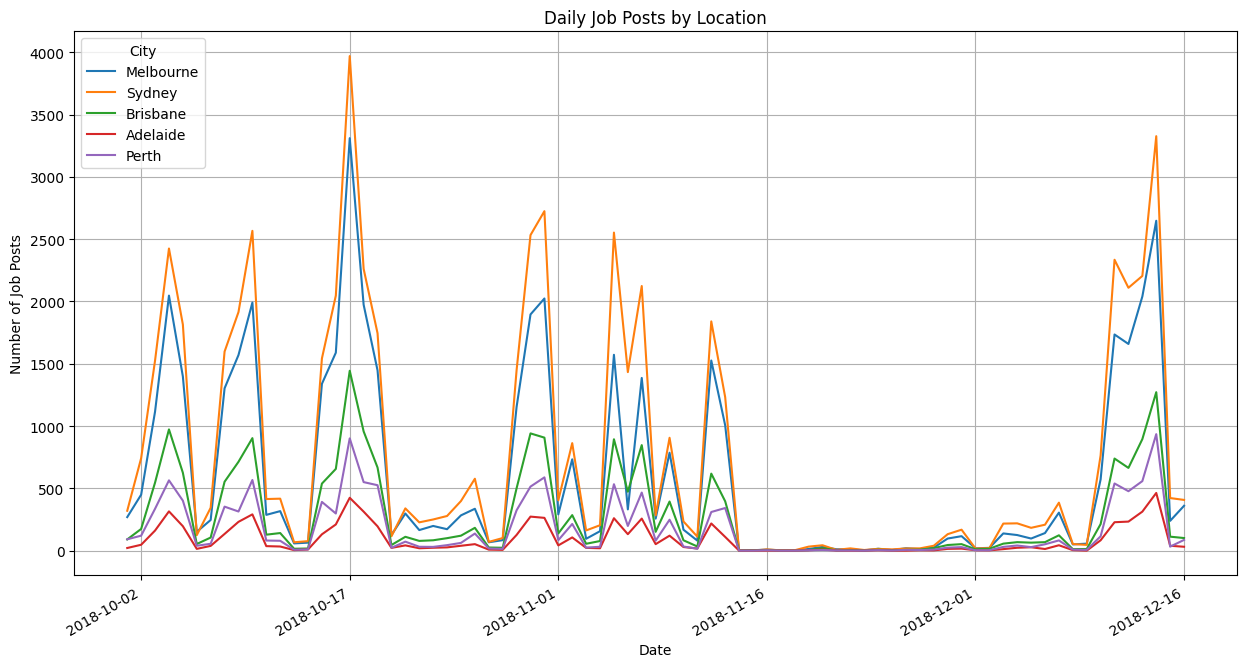

In [37]:
#Visualise trending of the job postings for the big cities.*
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'DatePosted' is already in datetime format
# If 'DatePosted' is not in datetime format, uncomment the next line:
# df['DatePosted'] = pd.to_datetime(df['DatePosted'])

# Filter data for the specified big cities
big_cities = ['Melbourne', 'Sydney', 'Brisbane', 'Adelaide', 'Perth']
filtered_data = df[df['Location'].isin(big_cities)]

# Group the data by 'Location' and 'DatePosted' on a daily basis
grouped_data = filtered_data.groupby(['Location', pd.Grouper(key='Date', freq='D')]).size()

# Unstack the grouped data so each city becomes a column
time_series_data = grouped_data.unstack(level=0).fillna(0)  # Fill missing values with 0 for days with no posts

# Plotting
plt.figure(figsize=(15, 8))
for city in big_cities:
    if city in time_series_data.columns:
        plt.plot(time_series_data.index, time_series_data[city], label=city, marker='', linestyle='-')

# Formatting the plot
plt.title('Daily Job Posts by Location')
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.legend(title='City')
plt.grid(True)

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Set major ticks every 15 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as year-month-day
plt.gcf().autofmt_xdate()  # Auto format date labels to avoid overlap

plt.show()


In [38]:
#Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.
print("The plots visualize that the job market is on demand for the job seekers as well as for the companies, it can be observed that on which (day,month, week) more jobs were being launched and also provide the analysis of different demand for jobs in different sectors and locations. This can be a valuable insight for the companies as well to give a much more hiring analysis and jobs to compete in this world race")

The plots visualize that the job market is on demand for the job seekers as well as for the companies, it can be observed that on which (day,month, week) more jobs were being launched and also provide the analysis of different demand for jobs in different sectors and locations. This can be a valuable insight for the companies as well to give a much more hiring analysis and jobs to compete in this world race


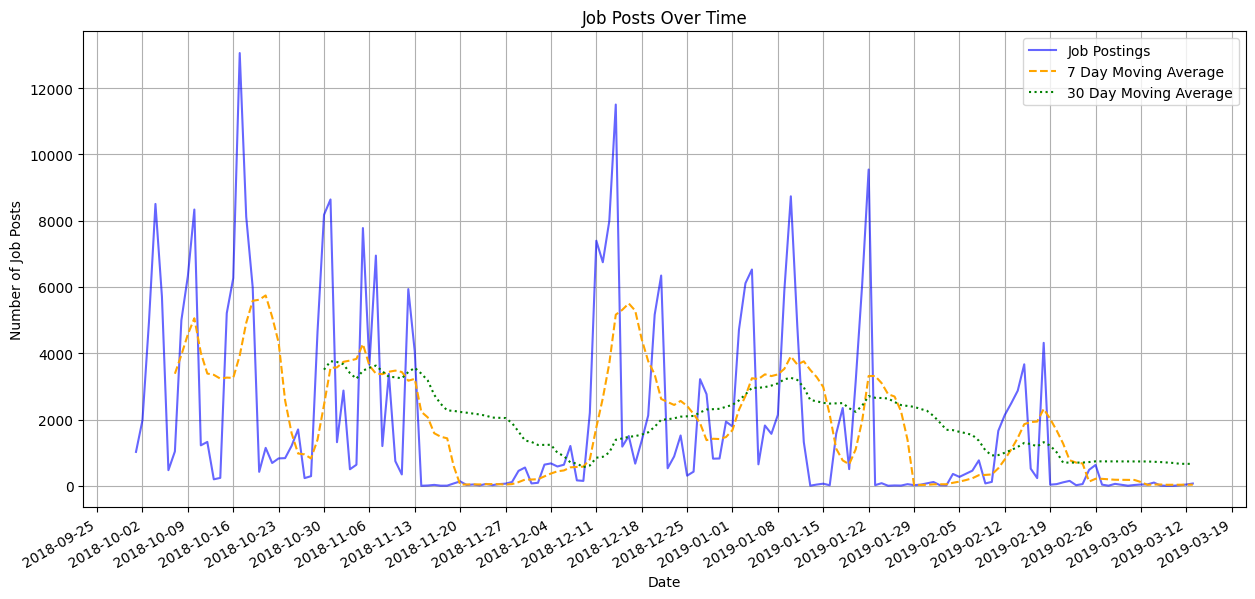

In [39]:
#Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.**
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'DatePosted' is in datetime format. If not, convert it:
# df['DatePosted'] = pd.to_datetime(df['DatePosted'])

# Aggregate job posts by day
daily_counts = df.groupby(df['Date'].dt.date).size()

# Calculate moving averages
daily_counts = pd.DataFrame(daily_counts, columns=['Job Posts'])
daily_counts['7 Day MA'] = daily_counts['Job Posts'].rolling(window=7).mean()
daily_counts['30 Day MA'] = daily_counts['Job Posts'].rolling(window=30).mean()

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(daily_counts.index, daily_counts['Job Posts'], label='Job Postings', color='blue', alpha=0.6)
plt.plot(daily_counts.index, daily_counts['7 Day MA'], label='7 Day Moving Average', color='orange', linestyle='dashed')
plt.plot(daily_counts.index, daily_counts['30 Day MA'], label='30 Day Moving Average', color='green', linestyle='dotted')

# Format the plot
plt.title('Job Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.legend()
plt.grid(True)

# Set x-axis major ticks to weekly interval
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 50 Keywords:
distribution
storage
warehousing
transport
road
machine
operators
management
assembly
process
work
services
inventory
procurement
purchasing
couriers
drivers
postal
packers
pickers
planning
production
scheduling
leaderssupervisors
team
forwarding
freightcargo
maritime
rail
assurance
control
quality
aviation
customs
importexport
fleet
analysis
reporting
public
taxi
garment
makers
pattern
technicians


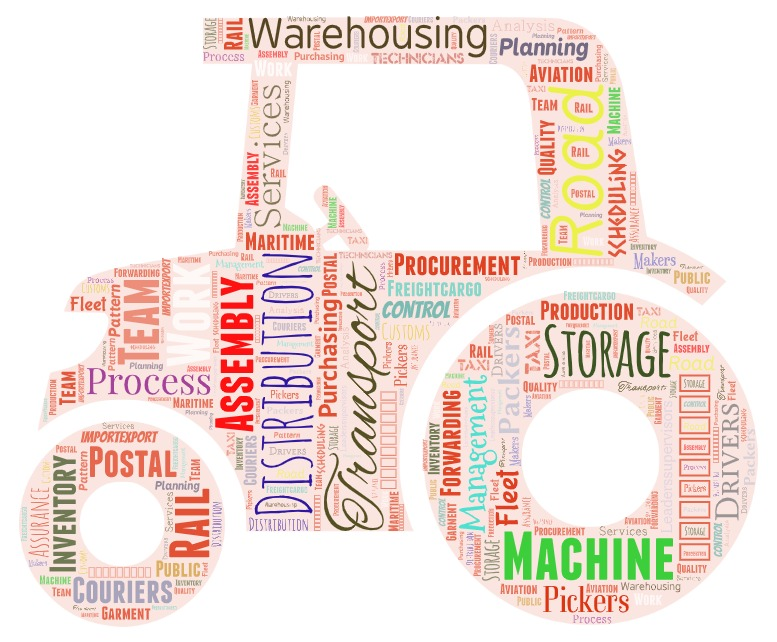

In [40]:
#Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**.
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from IPython.display import Image
nltk.download('stopwords')

# Sample data loading (adjust according to your data source)
# df = pd.read_csv('path_to_your_data.csv')

# Filter data for the Information Technology sector
it_jobs = df[df['Classification'] == 'Manufacturing, Transport & Logistics']['SubClassification']

# Text preprocessing
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Preprocess the job descriptions
it_jobs = it_jobs.apply(preprocess)

# TF-IDF calculation
vectorizer = TfidfVectorizer(max_features=100)  # considering the top 100 features
tfidf_matrix = vectorizer.fit_transform(it_jobs)

# Sum tf-idf scores for each term across all documents
sums = tfidf_matrix.sum(axis=0)
terms = vectorizer.get_feature_names_out()
tfidf_scores = {term: sums[0, idx] for idx, term in enumerate(terms)}

# Sort terms by their score
sorted_terms = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)

# Print the top 10 keywords
print("Top 50 Keywords:")
for term, score in sorted_terms[:50]:
    print(f"{term}")
# Provide the path to your image file here
image_path = 'datamarket.jpeg'

# Display the image
display(Image(filename=image_path))

### Get top 20 big cities and use bar chart to display market size in each city (2 marks).

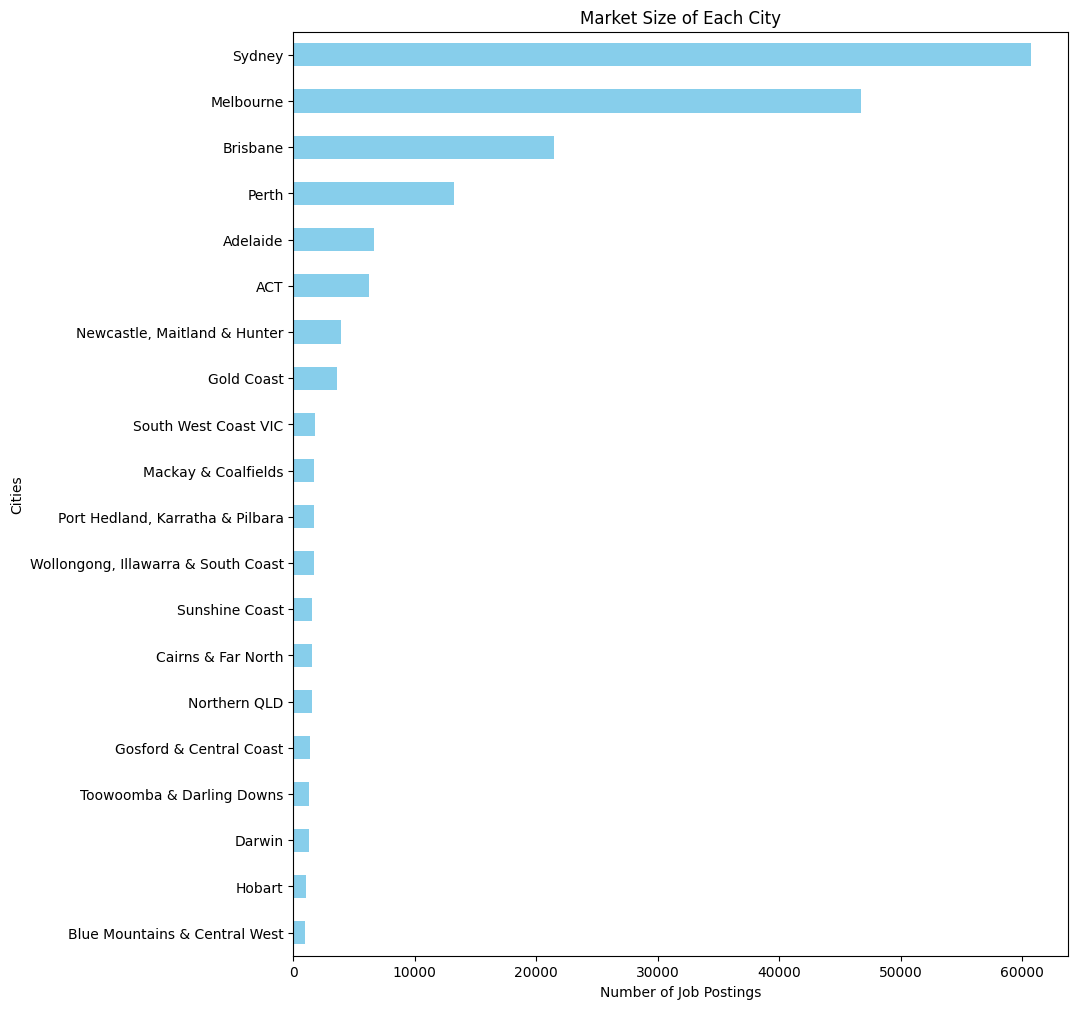

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it contains a 'Location' column with city names
# Step 1: Count the number of job postings per city
city_counts = df['Location'].value_counts()

# Step 2: Select the top 20 cities
top_cities = city_counts.head(20)

# Step 3: Create the plot
plt.figure(figsize=(10, 12))  # Adjust the figure size as needed to display all cities clearly
top_cities.plot(kind='barh', color='skyblue')  # Using a horizontal bar chart
plt.xlabel('Number of Job Postings')
plt.ylabel('Cities')
plt.title('Market Size of Each City')
plt.gca().invert_yaxis()  # Invert y-axis to have the city with the most postings at the top
plt.show()


### Visualize the market share between the cities (2 marks)

In [46]:
#Get top 10 big cities
locationDf = df['Location'].value_counts().rename_axis('Location').reset_index(name='Count')
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationTop10Df = locationDf[:10].copy()
#others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'Count' : [locationDf["Count"][10:].sum()]
})
locationTop10Df = pd.concat([locationTop10Df, new_row],sort=False)
locationTop10Df.index = locationTop10Df['Location']

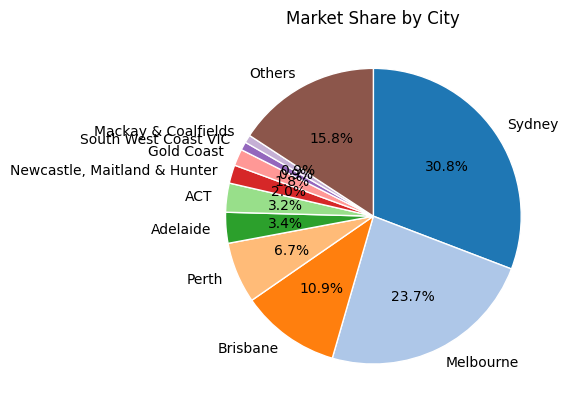

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame loading and preparation
# df = pd.read_csv('path_to_your_job_postings_data.csv')
locationDf = df['Location'].value_counts().rename_axis('Location').reset_index(name='Count')

# Sorting the data and selecting the top 10 cities
locationDf = locationDf.sort_values(by="Count", ascending=False)
locationTop10Df = locationDf[:10].copy()

# Aggregating all other locations into a single category
new_row = pd.DataFrame(data={
    'Location': ['Others'],
    'Count': [locationDf['Count'][10:].sum()]
})

# Combining top 10 cities with the "Others" category
locationTop10Df = pd.concat([locationTop10Df, new_row], ignore_index=True)
locationTop10Df.set_index('Location', inplace=True)

# Plotting the pie chart
fig, ax = plt.subplots()
locationTop10Df['Count'].plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, counterclock=False, 
                              wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
                              colors=plt.get_cmap('tab20').colors)
ax.set_ylabel('')  # Remove the y-label as it's not needed for pie charts
ax.set_title('Market Share by City')

# Display the plot
plt.show()


### Visualize the salary distribution in top biggest cities (2 marks)

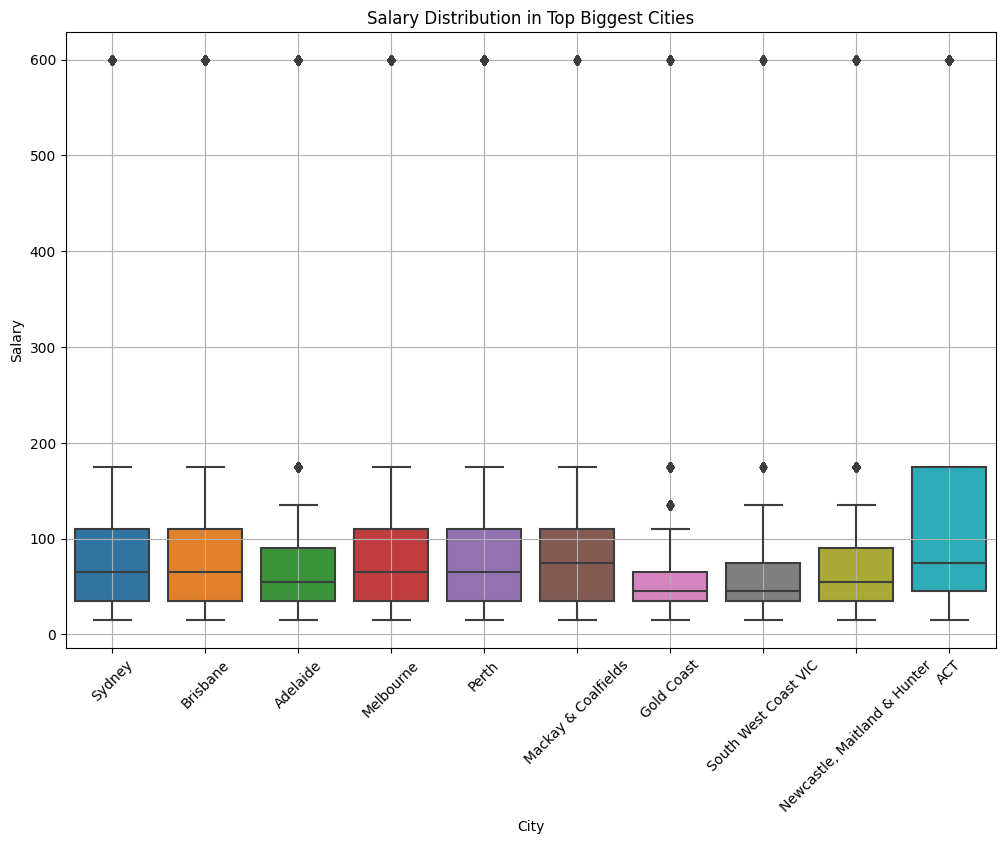

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and it contains 'Location' and 'Salary'
# First, let's identify the top biggest cities based on the number of job postings
top_cities = df['Location'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top cities
top_city_data = df[df['Location'].isin(top_cities)]

# Create a boxplot to visualize salary distribution in these cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='AverageSalary', data=top_city_data)

# Improve the aesthetics
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.title('Salary Distribution in Top Biggest Cities')
plt.xlabel('City')
plt.ylabel('Salary')
plt.grid(True)  # Add grid for better readability of the plot

# Show the plot
plt.show()


# 1.5 Study by sectors

### The number of postings for each sector. (2 marks)

<Figure size 1500x1300 with 0 Axes>

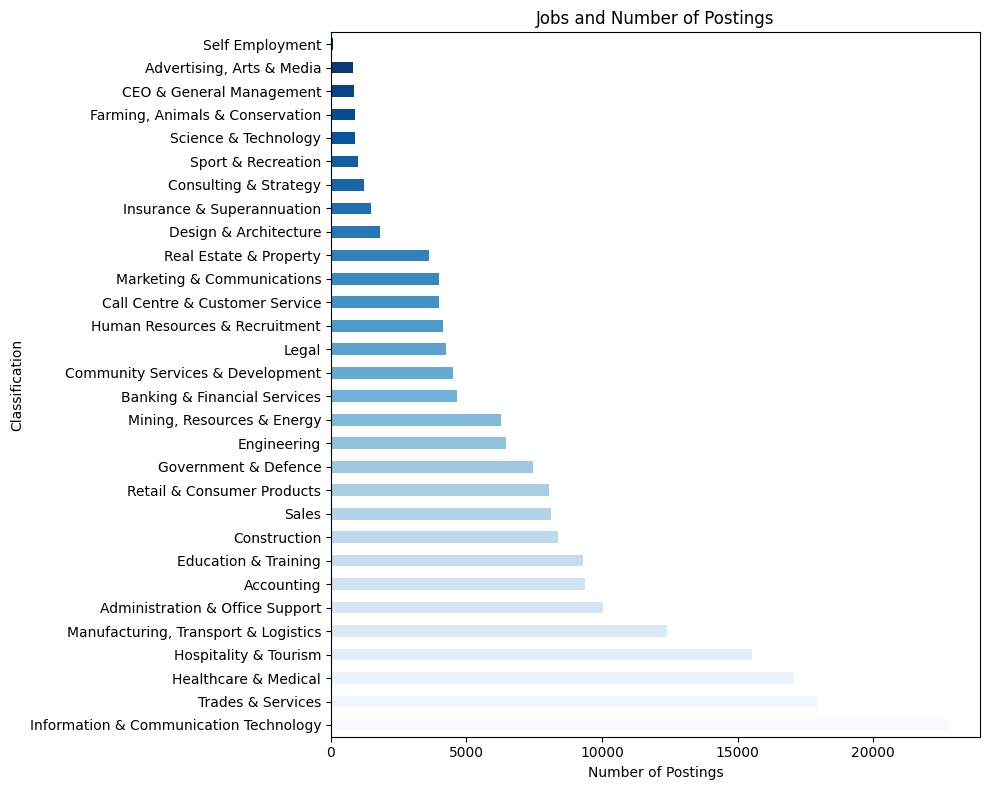

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and it has a 'Classification' column
classification_counts = df['Classification'].value_counts()

# Step 3: Create the plot
plt.figure(figsize=(15, 13))

# Using 'tab20' colormap that provides up to 20 distinct colors
# If more than 20 classifications, consider an alternative approach as mentioned
#colors = sns.color_palette('tab20', n_colors=len(classification_counts))
colors = plt.cm.Blues(np.linspace(0, 1, len(classification_counts)))

# Step 3: Create the plot with a color gradient
plt.figure(figsize=(10, 8))
sector_counts.plot(kind='barh', color=colors)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Classification')
plt.tight_layout()
#plt.grid(True, linestyle='--', alpha=0.6)
# Show plot
plt.show()


### Find the main spotlight sub-sectors in each sector (1 mark)

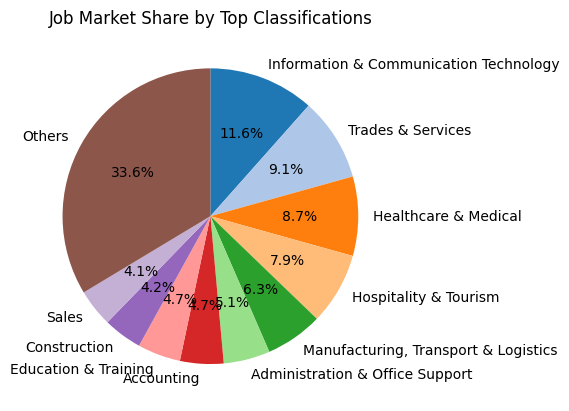

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_classification is your DataFrame and it contains 'Classification'
# If you need to aggregate data by 'Sector' and then look at 'Classification' within, modify the groupby accordingly.

# Group by 'Classification' and count entries
df_pie = df['Classification'].value_counts().to_frame()
df_pie.columns = ['Value']  # Rename the column to 'Value'
df_pie['Classification'] = df_pie.index  # Ensure 'Classification' is a column, not just index

# Take the top 10 classifications and aggregate the rest into 'Others'
top_classifications = df_pie[:10].copy()
others_sum = df_pie['Value'][10:].sum()
top_classifications.loc['Others'] = {'Value': others_sum, 'Classification': 'Others'}

# Create the pie chart
fig, ax = plt.subplots()
colors = plt.get_cmap('tab20').colors  # Using a colormap that provides distinct colors
top_classifications['Value'].plot(kind='pie', labels=top_classifications['Classification'], autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors, ax=ax)

# Customize the plot
ax.set_ylabel('')  # Remove the y-label as it's not needed for pie charts
ax.set_title('Job Market Share by Top Classifications')

# Show the plot
plt.show()


### Visualize the salary range in the sectors/sub-sectors (1 mark)

In [49]:
!pip install python-docx


In [50]:
from docx import Document

def read_docx(file_path):
    # Create a Document object and load the .docx file
    doc = Document(file_path)
    
    # Initialize a list to hold all the text in the document
    full_text = []

    # Loop through each paragraph in the document
    for para in doc.paragraphs:
        # Add the text from each paragraph to the list
        full_text.append(para.text)
    
    # Join all the paragraphs into a single string
    # Each paragraph is separated by a newline character for better readability
    return '\n'.join(full_text)

# Specify the path to your .docx file
file_path = 'PART4.docx'

# Read and display the content of the document
document_content = read_docx(file_path)
print(document_content)


PART- 4. DISCUSSION


Scenario 1: 

Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words)

Recommendation for Tom:-

Analysis:
In order to suggest a major to Tom, who is looking for a high-paying career in Queensland that pays more than $80,000 per year, we must consider the current trends in the employment market with regard to industries that are both high-paying and thriving. We'll pay special attention to industries that are typically thought to provide better beginning earnings and steady career growth.

Recommendation:

Based on job market data analysis, a major in Computer Science or Information & Communication Technology would be highly recommended for Tom. As the techno